## 1) EARNINGS BASED ON COLLEGE MAJORS


In this course, we've been creating plots using pyplot and matplotlib directly.  
When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome.   Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames.  
Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib.  
This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.

In this guided project, we'll explore how using the **pandas plotting functionality** along with the Jupyter notebook interface allows us to explore data quickly using visualizations. If you're new to either our guided projects or Jupyter notebook in general, you can learn more here.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. 
The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.https://github.com/fivethirtyeight/data/tree/master/college-majors

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:


+ Rank	                |Rank by median earnings                                              
+ Major_code	            | Major code, FO1DP in ACS PUMS
+ Major	                |Major description
+ Major_category	        |Category of major from Carnevale et al
+ Total	                |Total number of people with major
+ Sample_size	        |Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
+ Men	                |Male graduates
+ Women	                |Female graduates
+ ShareWomen  	        |Women as share of total
+ Employed	            |Number employed (ESR == 1 or 2)
+ Full_time	            |Employed 35 hours or more
+ Part_time	            |Employed less than 35 hours
+ Full_time_year_round	|Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
+ Unemployed	Number      |unemployed (ESR == 3)
+ Unemployment_rate	    |Unemployed / (Unemployed + Employed)
+ Median	                |Median earnings of full-time, year-round workers
+ P25th	                |25th percentile of earnigns
+ P75th	                |75th percentile of earnings
+ College_jobs	        |Number with job requiring a college degree
+ Non_college_jobs	    |Number with job not requiring a college degree
+ Low_wage_jobs	        |Number in low-wage service jobs


#### Using visualizations, we can start to explore questions from the dataset like:

+ Do students in more popular majors make more money?

#### Using scatter plots
+ How many majors are predominantly male? Predominantly female?

#### Using histograms
+ Which category of majors have the most students?

#### Using bar plots
+ We'll explore how to do these and more while primarily working in pandas.  

Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.
Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.

+ Import pandas and matplotlib into the environment.
+ Run the Jupyter magic %matplotlib inline so that plots are displayed inline.
+ Read the dataset into a DataFrame and start exploring the data. 

Ref : https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [1]:
import pandas as pd 
import matplotlib
%matplotlib inline

# Read recent-grads.csv into pandas and assign the resulting DataFrame to recent_grads. 
recent_grads = pd.read_csv('recent-grads.csv')

#Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.
recent_grads.head(2)


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


In [2]:
recent_grads.tail()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [3]:
recent_grads.shape


(173, 21)

In [4]:
# Use DataFrame.describe() to generate summary statistics for all of the numeric columns.
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


REF: https://www.youtube.com/watch?v=xvpNA7bC8cs (Loc,iloc)

In [5]:
# Use DataFrame.iloc[] to return the first row formatted as a table.
recent_grads.iloc[0,:]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [6]:
# Look up the number of rows in recent_grads and assign the value to raw_data_count.
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [7]:
'''Drop rows with missing values.Matplotlib expects that columns of values we pass in have matching 
  lengths and missing values will cause matplotlib to throw errors.'''

# Use **DataFrame.dropna()** to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.
# If you compare cleaned_data_count and raw_data_count, you'll notice that only one row contained missing values and wasdropped.

cleaned_data_count = (recent_grads.dropna()).shape[0]
print(cleaned_data_count)

172


## 2. Pandas, Scatter Plots

Most of the plotting functionality in pandas is contained within the **DataFrame.plot() method**.  
When we call this method, we specify the data we want plotted as well as the type of plot.  
We use the **kind** parameter to specify the type of plot we want.  
We use x and y to specify the data we want on each axis.  
Ref : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

```recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')```

If you create a new cell in jupyter notebook and run the above code, the scatter plot will be displayed immediately.  
This functionality is a byproduct of running the jupyter magic %matplotlib inline.  
This means we can write one line of code to generate a scatter plot, run the cell using a keyboard shortcut, inspect the plot, and repeat.  The **DataFrame.plot()** method has a few parameters we can use for tweaking the scatter plot:

```recent_grads.plot(x='Sample_size', y='Employed', kind='scatter',title='Employed vs. Sample_size', figsize=(5,10))```   
We can access the underlying matplotlib Axes object by assigning the return value to a variable:


```ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')```  
```ax.set_title('Employed vs. Sample_size')```  

When you run the code above in a jupyter notebook cell, the plot will be returned inline just like before.

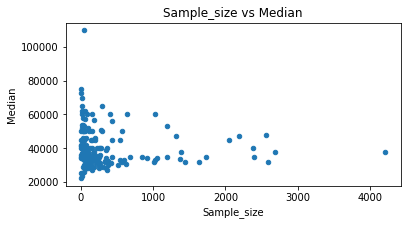

In [8]:
#Using Dataframe.plot() Sample_size and Median
recent_grads.plot(x='Sample_size',y='Median',kind='scatter',title='Sample_size vs Median',figsize=(6,3))

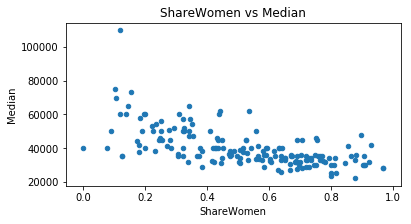

In [9]:
#ShareWomen Vs Median
recent_grads.plot(x='ShareWomen',y='Median',kind='scatter',title='ShareWomen vs Median',figsize=(6,3))

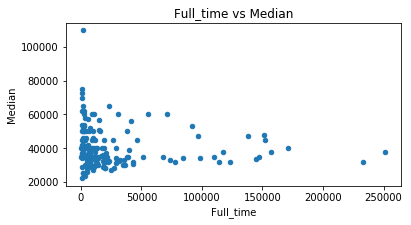

In [10]:
# Full_time and Median
recent_grads.plot(x='Full_time',y='Median',kind='scatter',title='Full_time vs Median',figsize=(6,3))


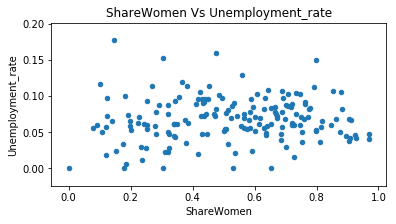

In [11]:
# ShareWomen and Unemployment_rate
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',title='ShareWomen Vs Unemployment_rate',figsize=(6,3))


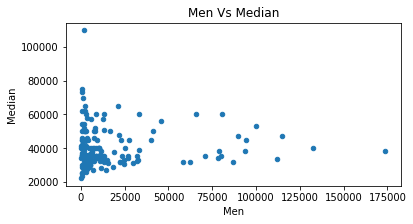

In [12]:
#Men and Median
recent_grads.plot(x='Men',y='Median',kind='scatter',title='Men Vs Median',figsize=(6,3))


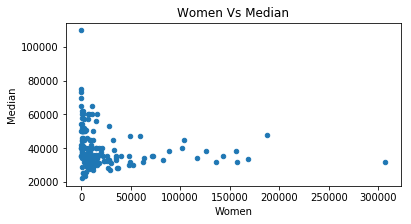

In [13]:
#Women and Median
recent_grads.plot(x='Women',y='Median',kind='scatter',title='Women Vs Median',figsize=(6,3))


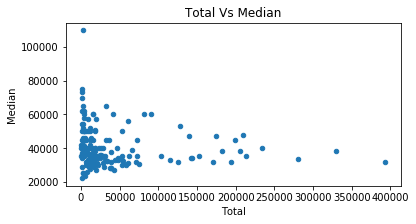

In [14]:
#Total  and Median
recent_grads.plot(x='Total',y='Median',kind='scatter',title='Total Vs Median',figsize=(6,3))

### Questions 

Use the plots to explore the following questions:  

**1. Do students in more popular majors make more money?**  
Nope . (Total Vs Median) Class with 400k  kids has median income around $30k  

**2. Do students that majored in subjects that were majority female make more money?**  
Not really ( ShareWomen Vs Median) Scatter plot skews towards $40k as females increase  

**3. Is there any link between the number of full-time employees and median salary?**  
Not really ( Full time Vs Median) everyones salary is clustered around $30k - $60k regardless of increase in hours 

## 3. Pandas, Histograms - Exploring Single Columns

To explore the distribution of values in a column, we can select it from the DataFrame, call Series.plot(),  
and set the kind parameter to hist:  

``recent_grads['Sample_size'].plot(kind='hist')``  

The **DataFrame.plot()** and **Series.plot()** methods have many of the same parameters but are used for different use cases.  We use **Series.plot()** to plot a specific column and **DataFrame.plot()** to generate plots that use values from multiple columns.  

For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using **Series.plot().**

If you've looked at the documentation for **Series.plot()**, you'll notice there is no way to control the binning strategy for histograms.  Luckily, we can control the binning strategy of a histogram using Series.hist(), which contains parameters specific to customizing histograms:


```recent_grads['Sample_size'].hist(bins=25, range=(0,5000))```


#### Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
+ Sample_size
+ Median
+ Employed
+ Full_time
+ ShareWomen
+ Unemployment_rate
+ Men
+ Women

Use the plots to explore the following questions:
What percent of majors are predominantly male? Predominantly female?
What's the most common median salary range?

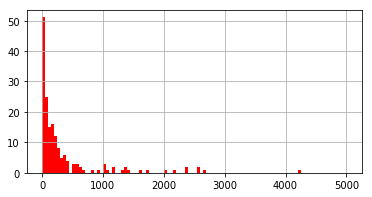

In [15]:
#Sample_size	Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
#recent_grads['Sample_size'].plot(kind='hist')
rcsample = recent_grads['Sample_size']
rcsample.hist(bins=100,range=(0,5000),histtype='stepfilled',figsize=(6,3),color='red')

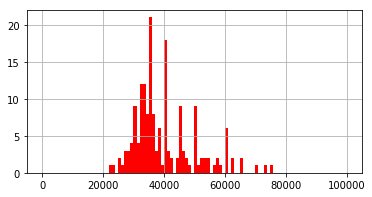

In [16]:
#Median - Median salary of full-time, year-round workers.
recent_grads['Median'].hist(bins=100,range=(0,100000),histtype='stepfilled',figsize=(6,3),color='red')

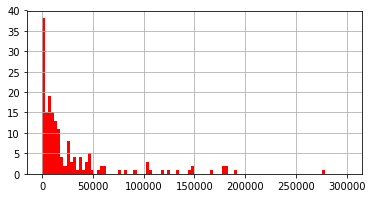

In [17]:
#Employed |Number employed (ESR == 1 or 2)
recent_grads['Employed'].hist(bins=100,range=(0,300000),histtype='stepfilled',figsize=(6,3),color='red')

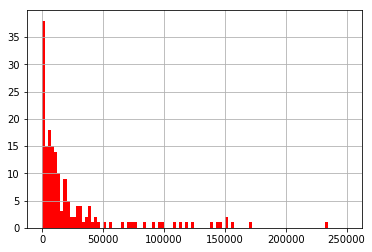

In [18]:
#Full_time |Employed 35 hours or more
recent_grads['Full_time'].hist(bins=100,histtype='stepfilled',range=(0,250000),color='red')

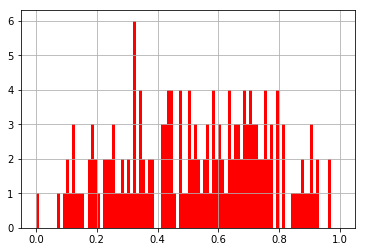

In [19]:
#ShareWomen |Women as share of total
recent_grads['ShareWomen'].hist(bins=100,range=(0,1),histtype='stepfilled',color='red')

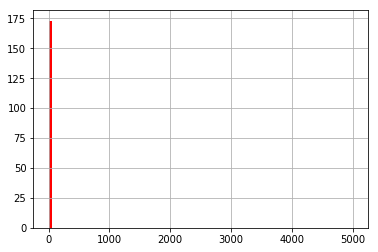

In [20]:
#Unemployment_rate |Unemployed / (Unemployed + Employed)
recent_grads['Unemployment_rate'].hist(bins=100,histtype='stepfilled',range=(0,5000),color='red')

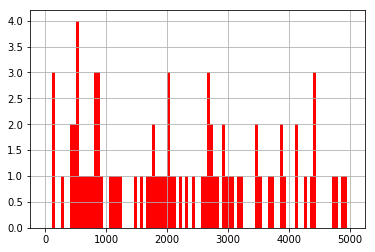

In [21]:
#Men |Male graduates
recent_grads['Men'].hist(bins=100,range=(0,5000),histtype='stepfilled',color='red')

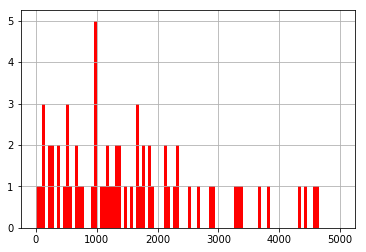

In [22]:
#Women | Female graduates
recent_grads['Women'].hist(bins=100,histtype='stepfilled',range=(0,5000),color='red')

## 4. Pandas, Scatter Matrix Plot

In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. **A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.**  

A scatter matrix plot consists of n by n plots on a grid, where **n is the number of columns,the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.** Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named **scatter_matrix()** that generates the plots for us. This function is part of the **pandas.plotting module** and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.


```scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))```

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. If you increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if you increase the plotting area using the figsize parameter).

REF : https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot




## Creating a 2 by 2 and a 3 by 3 Scatter Matrix 

+ Import scatter_matrix from the pandas.plotting module.
+ Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
+ Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
+ Explore the questions from the last few steps using these scatter matrix plots. You may need to create more scatter matrix plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F876D96908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000F876E470F0>]], dtype=object)

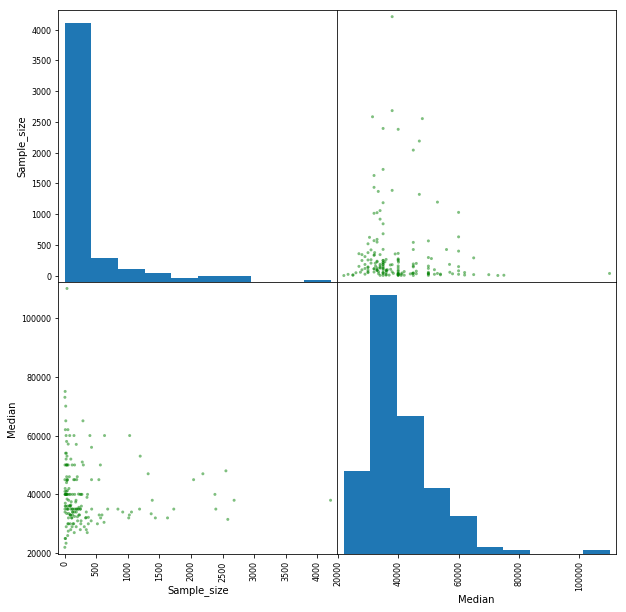

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(10,10),color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F8771504A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000F877063518>]], dtype=object)

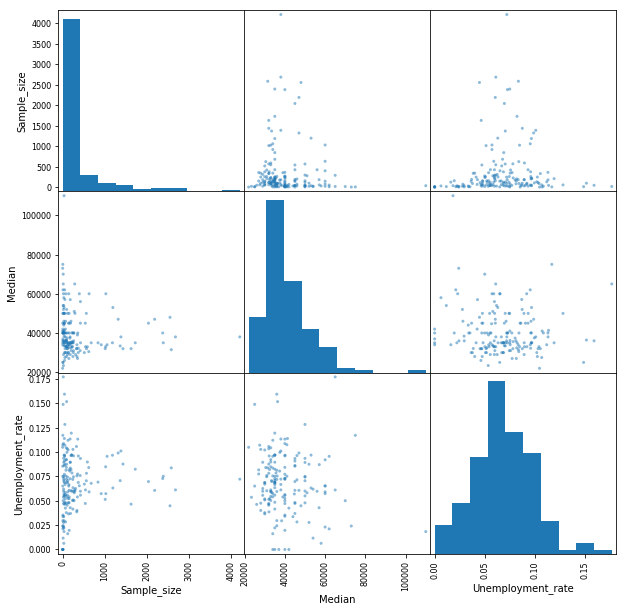

In [24]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))

## 5. Pandas, Bar Plots

To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves.  
We had to specify the locations, labels, lengths, and widths of the bars.  
When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the Women column.

+ ```recent_grads[:5]['Women'].plot(kind='bar')```

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib.  
If we instead use the **DataFrame.plot.bar()** method, we can use the x parameter to specify the labels and 
the y parameter to specify the data for the bars:

+ ```recent_grads[:5].plot.bar(x='Major', y='Women')```


+ Use bar plots to compare the percentages of women (ShareWomen) from the first 10 rows and last 10 rows of a sorted dataframe.
+ Use bar plots to compare the unemployment rate (Unemployment_rate) from the first 10 rows and last 10 rows of a sorted dataframe.

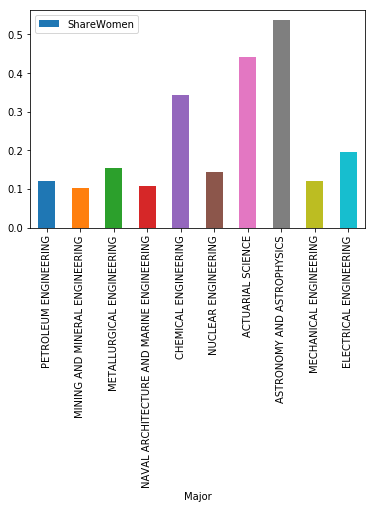

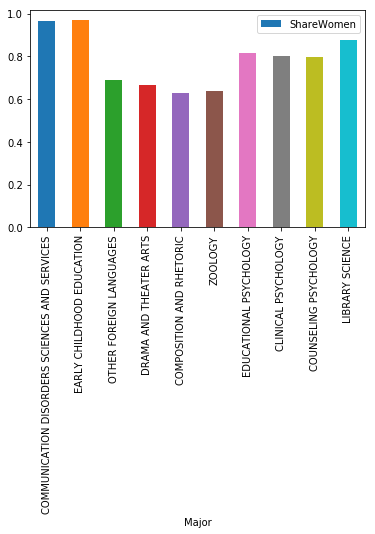

In [25]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
# there are 173 rows
recent_grads[163:].plot.bar(x='Major', y='ShareWomen')

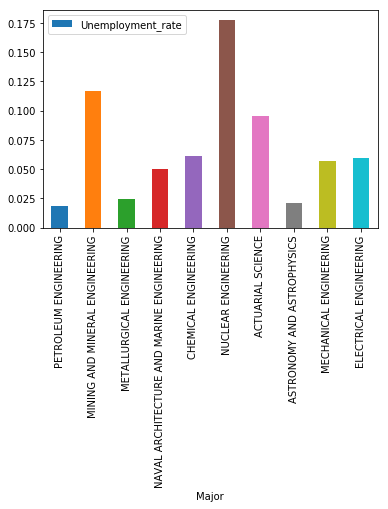

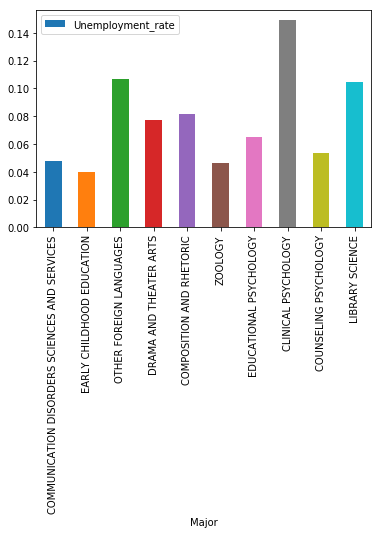

In [26]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate')